<a href="https://colab.research.google.com/github/aplneto/IF1014/blob/main/IF1014___Cammeo_and_Osmancik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mineração de Dados (IF1014)

* [Ailton Rodrigues](mailto:ajr@cin.ufpe.br)
* [Antônio Paulino](mailto:apln2@cin.ufpe.br)
* [Douglas Tavares](mailto:dtrps@cin.ufpe.br)

## Links

* [Rice (Cammeo and Osmancik) Data Set](https://archive.ics.uci.edu/ml/datasets/Rice+%28Cammeo+and+Osmancik%29#)
* [Download page](https://www.muratkoklu.com/datasets/)

## Descrição

Among the certified rice grown in TURKEY, the Osmancik species, which has a large planting area since 1997 and the Cammeo species grown since 2014 have been selected for the study. When looking at the general characteristics of Osmancik species, they have a wide, long, glassy and dull appearance. When looking at the general characteristics of the Cammeo species, they have wide and long, glassy and dull in appearance. A total of 3810 rice grain's images were taken for the two species, processed and feature inferences were made. 7 morphological features were obtained for each grain of rice.

## Features

1. Area: Returns the number of pixels within the boundaries of the rice grain.
1. Perimeter: Calculates the circumference by calculating the distance between pixels around the boundaries of the rice grain.
1. Major Axis Length: The longest line that can be drawn on the rice grain, i.e. the main axis distance, gives.
1. Minor Axis Length: The shortest line that can be drawn on the rice grain, i.e. the small axis distance, gives.
1. Eccentricity: It measures how round the ellipse, which has the same moments as the rice grain, is.
1. Convex Area: Returns the pixel count of the smallest convex shell of the region formed by the rice grain.
1. Extent: Returns the ratio of the regionformed by the rice grain to the bounding box pixels.
1. Class: Cammeo and Osmancik rices

### Insalação de bibliotecas

In [ ]:
!python3 -m pip install --quiet optuna
!python3 -m pip install --quiet scikit-plot

ERROR: Operation cancelled by user


## Business Understanding

* Problema de classificação: duas classes.

## Análise exploratória

### Funções auxiliares: análise de dados

In [ ]:
%matplotlib inline
import pylab
import pandas
import numpy
from scipy import stats
from matplotlib import pyplot

def plot_continuous_columns(series: pandas.core.series.Series):
  fig = series.plot.hist()
  print(series.describe())
  print('Null values:', series.isnull().sum())
  return fig

def box_plot_column(series: pandas.core.series.Series):
  figure = series.plot.box(vert=False)
  Q1 = series.quantile(0.25)
  Q3 = series.quantile(0.75)
  IQR = Q3 - Q1
  outliers = ((series < (Q1 - 1.5 * IQR)) | (series > (Q3 + 1.5 * IQR))).sum()
  print("Outliers: %i" % outliers)
  return figure

def qqplot(series: pandas.core.series.Series, title, distribution='norm'):
  stats.probplot(series, dist=distribution, plot=pylab)
  pylab.title(title)
  pylab.show()

In [ ]:
rice = pandas.read_excel('https://www.muratkoklu.com/datasets/vtdhnd03.php')
rice.head()

,AREA,PERIMETER,MAJORAXIS,MINORAXIS,ECCENTRICITY,CONVEX_AREA,EXTENT,CLASS
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


In [ ]:
rice.isnull().sum()

AREA            0
PERIMETER       0
MAJORAXIS       0
MINORAXIS       0
ECCENTRICITY    0
CONVEX_AREA     0
EXTENT          0
CLASS           0
dtype: int64

In [ ]:
rice.describe()

,AREA,PERIMETER,MAJORAXIS,MINORAXIS,ECCENTRICITY,CONVEX_AREA,EXTENT
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413
25%,11370.500000,426.144753,174.353855,82.731695,0.872402,11626.250000,0.598862
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050


count     3810.000000
mean     12667.727559
std       1732.367706
min       7551.000000
25%      11370.500000
50%      12421.500000
75%      13950.000000
max      18913.000000
Name: AREA, dtype: float64
Null values: 0


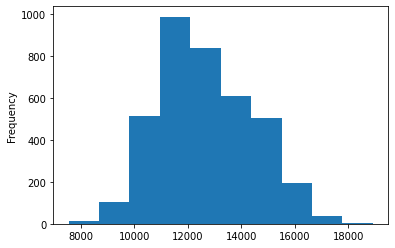

Outliers: 4


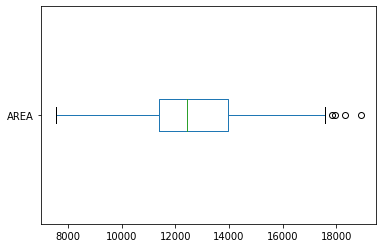

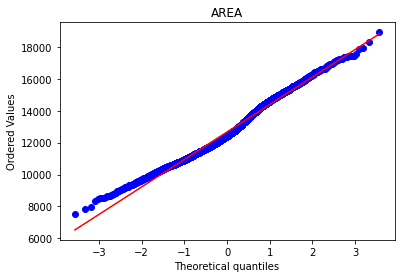

count    3810.000000
mean      454.239180
std        35.597081
min       359.100006
25%       426.144753
50%       448.852493
75%       483.683746
max       548.445984
Name: PERIMETER, dtype: float64
Null values: 0


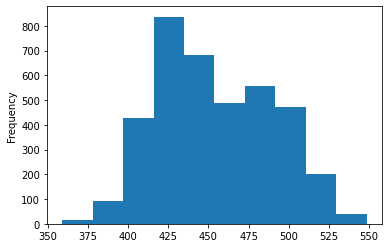

Outliers: 0


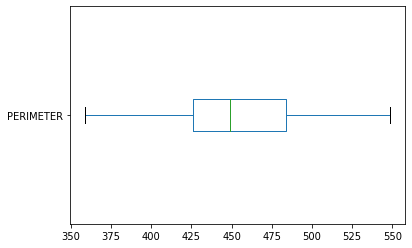

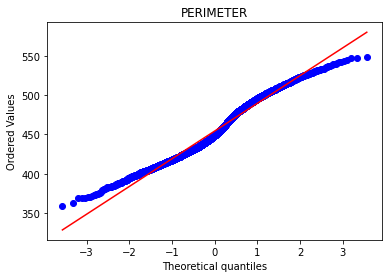

count    3810.000000
mean      188.776222
std        17.448679
min       145.264465
25%       174.353855
50%       185.810059
75%       203.550438
max       239.010498
Name: MAJORAXIS, dtype: float64
Null values: 0


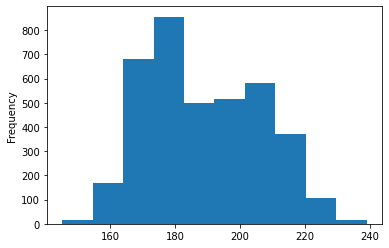

Outliers: 0


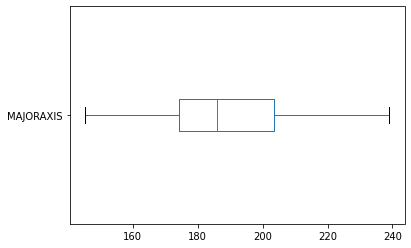

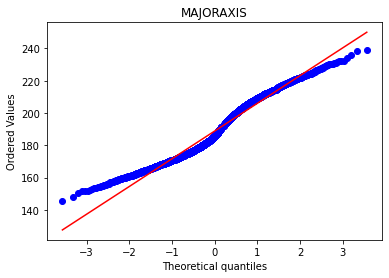

count    3810.000000
mean       86.313750
std         5.729817
min        59.532406
25%        82.731695
50%        86.434647
75%        90.143677
max       107.542450
Name: MINORAXIS, dtype: float64
Null values: 0


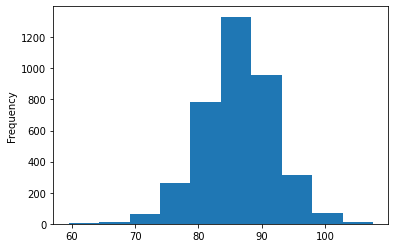

Outliers: 65


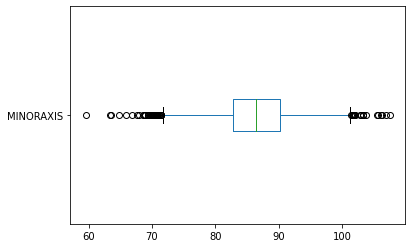

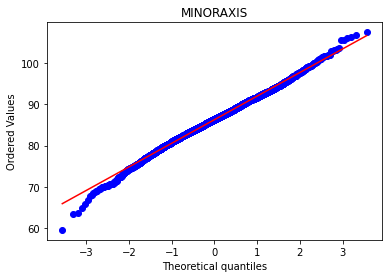

count    3810.000000
mean        0.886871
std         0.020818
min         0.777233
25%         0.872402
50%         0.889050
75%         0.902588
max         0.948007
Name: ECCENTRICITY, dtype: float64
Null values: 0


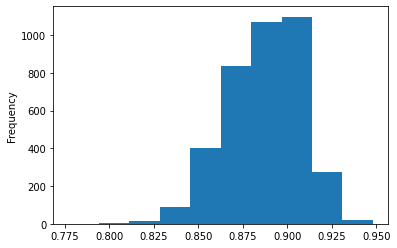

Outliers: 21


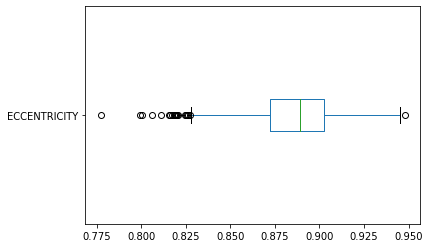

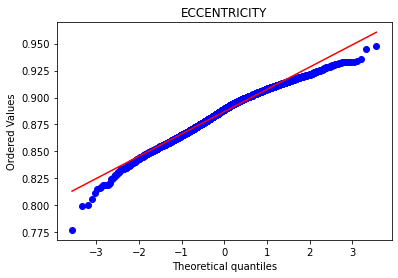

count     3810.000000
mean     12952.496850
std       1776.972042
min       7723.000000
25%      11626.250000
50%      12706.500000
75%      14284.000000
max      19099.000000
Name: CONVEX_AREA, dtype: float64
Null values: 0


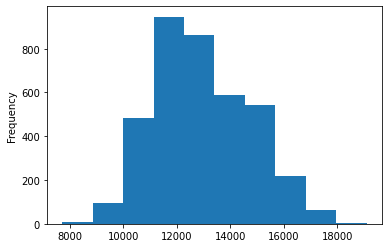

Outliers: 3


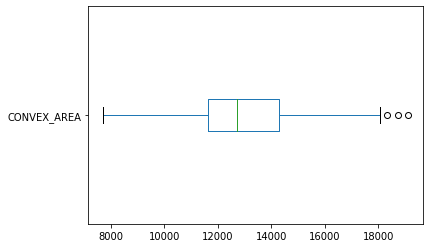

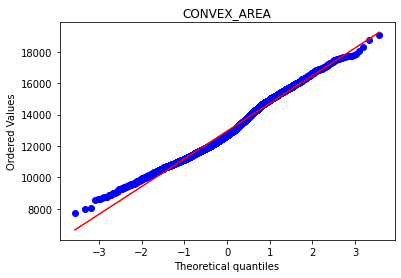

count    3810.000000
mean        0.661934
std         0.077239
min         0.497413
25%         0.598862
50%         0.645361
75%         0.726562
max         0.861050
Name: EXTENT, dtype: float64
Null values: 0


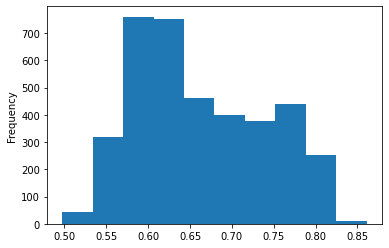

Outliers: 0


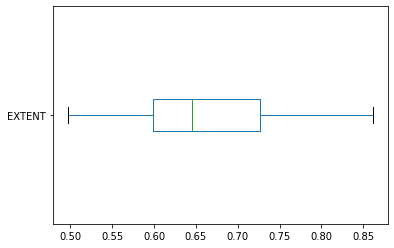

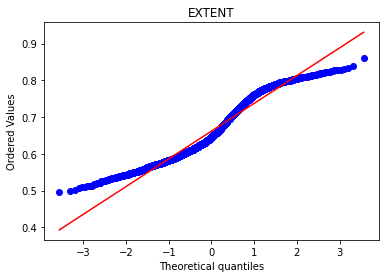

In [ ]:
for column in rice.describe().columns:
  plot_continuous_columns(rice[column])
  pyplot.show()
  box_plot_column(rice[column])
  pyplot.show()
  qqplot(rice[column], column)

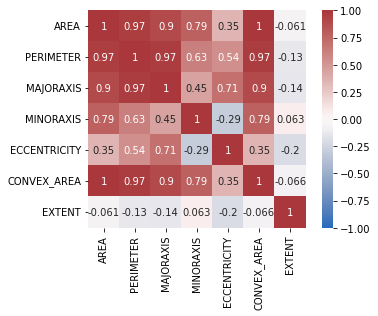

In [ ]:
import seaborn

seaborn.heatmap(
    rice.corr(), cmap='vlag', vmax=1.0, vmin=-1.0, annot=True, square=True
)
pyplot.show()

## Preparação dos dados

### Label encoding das classes

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
labels = LabelEncoder()
X = rice.drop(['CLASS'], axis=1)
Y = labels.fit_transform(rice['CLASS'])
rice['CLASS'].value_counts()

Osmancik    2180
Cammeo      1630
Name: CLASS, dtype: int64

In [ ]:
rice['CLASS'] = Y
rice['CLASS'].value_counts()

1    2180
0    1630
Name: CLASS, dtype: int64

## Experimentos

### Funções auxiliares: geradores de modelos

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier,\
  VotingClassifier
from sklearn.neural_network import MLPClassifier
from optuna.trial import FixedTrial

In [ ]:
def knn_factory(trial: FixedTrial):
  params = {}
  params['n_neighbors'] = trial.suggest_int(
      'n_neighbors', 3, 9, 1
  )
  params['weights'] = trial.suggest_categorical(
      'weights', ['uniform', 'distance']
  )
  params['p'] = trial.suggest_categorical('p', [1, 2])
  model = KNeighborsClassifier(**params)
  return model

def svc_factory(trial: FixedTrial):
  params = {'probability': True}
  params['C'] = trial.suggest_float('C', 1.0, 100.0, step=1.0)
  params['kernel'] = trial.suggest_categorical(
      'kernel', ['linear', 'poly', 'rbf', 'sigmoid']
  )
  if (params['kernel'] == 'linear'):
    params['degree'] = trial.suggest_int('degree', 1, 3)
  else:
    params['gamma'] = trial.suggest_categorical(
      'gamma', ['scale', 'auto']
    )
  model = SVC(**params)
  return model

def decision_tree_factory(trial: FixedTrial):
  params = {}
  params['criterion'] = trial.suggest_categorical(
      'criterion', ['gini', 'entropy']
  )
  params['splitter'] = trial.suggest_categorical(
      'splitter', ['best', 'random']
  )
  params['max_depth'] = trial.suggest_int('max_depth', 2, 12)
  params['min_samples_leaf'] = trial.suggest_float(
      'min_samples_leaf', 0.1, 0.5, step=0.05
  )

  model = DecisionTreeClassifier(**params)
  return model

def random_forest_factory(trial: FixedTrial):
  params = {}
  params['n_estimators'] = trial.suggest_int('n_estimators', 3, 31, 2)
  params['criterion'] = trial.suggest_categorical(
      'criterion', ['gini', 'entropy']
  )
  
  model = RandomForestClassifier(**params)
  return model

def single_layer_mlp_factory(trial: FixedTrial):
  params = {
      'early_stopping': True
  }
  params['hidden_layer_sizes'] = (
      trial.suggest_int('hidden_layer_sizes', 2, 7, 1),
  )
  params['activation'] = trial.suggest_categorical(
      'activation', ['relu', 'tanh', 'identity', 'logistic']
  )
  params['solver'] = trial.suggest_categorical(
      'solver', ['lbfgs', 'sgd', 'adam']
  )
  params['alpha'] = trial.suggest_categorical(
      'alpha', [0.0001, 0.001, 0.01, 0.1, 1.0]
  )
  model = MLPClassifier(**params)
  return model

def double_layer_mlp_factory(trial: FixedTrial):
  params = {
      'early_stopping': True
  }
  l1 = trial.suggest_int('hidden_layer_sizes_0', 2, 7, 1)
  l2 = trial.suggest_int('hidden_layer_sizes_1', 1, max(2, l1//2, 1))
  params['hidden_layer_sizes'] = (l1, l2)
  params['activation'] = trial.suggest_categorical(
      'activation', ['relu', 'tanh', 'identity', 'logistic']
  )
  params['solver'] = trial.suggest_categorical(
      'solver', ['lbfgs', 'sgd', 'adam']
  )
  params['alpha'] = trial.suggest_categorical(
      'alpha', [0.0001, 0.001, 0.01, 0.1, 1.0]
  )
  model = MLPClassifier(**params)
  return model

def mlp_ensemble_factory(trial: FixedTrial):
  params = {}
  params['n_estimators'] = trial.suggest_int('n_estimators', 3, 11, 2)
  params['max_features'] = trial.suggest_float(
      'max_features', 0.5, 1.0, step=0.1
  )
  params['max_samples'] = trial.suggest_float('max_samples', 0.5, 1.0, step=0.1)
  params['base_estimator'] = single_layer_mlp_factory(trial)
  model = BaggingClassifier(**params)
  return model

In [ ]:
def make_model(x, y, model_factory, rndstate=None, **kwargs):
  n_splits = kwargs.get('n_splits', 10)
  n_repeats = kwargs.get('n_repeats', 5)
  def train_model(trial: FixedTrial):
    model = model_factory(trial)
    kfold = RepeatedStratifiedKFold(
        n_splits=n_splits, n_repeats=n_repeats, random_state=rndstate
    )
    scores = cross_validate(
        model, x, y, scoring='accuracy', cv=kfold, n_jobs=-1
    )
    return numpy.mean(scores["test_score"])
  return train_model

### Funções auxiliares: avaliação de modelos

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,\
  roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from scikitplot.metrics import plot_ks_statistic, plot_roc,\
  plot_confusion_matrix
from optuna.study import Study

In [ ]:
def evaluate_study(study: Study):
  study_accuracy = [t.value for t in study.trials]
  df = pandas.DataFrame({'accuracy': study_accuracy})
  box = box_plot_column(df['accuracy'])
  pyplot.show()
  return df

In [ ]:
def recreate_study_best_model(study: Study, model_type: str):
  '''
  Função criada para avaliação dos melhores modelos de cada estudo.

  Params:
    - study: caso de estudo contendo a otimização de hiperparâmetros do modelo
    - model_type: tipo de modelo. Alguns modelos possuem métodos de recriação
      diferentes, deve ser um dentre:
            knn, svc, decision_tree, random_forest, single_mlp, double_mlp,
            mlp_bagging, hybrid_bagging
  Returns: o modelo treinado
  '''
  models_allowed = [
    'knn', 'svc', 'decision_tree', 'random_forest', 'single_mlp', 'double_mlp',
    'mlp_ensemble'
  ]
  if model_type not in models_allowed:
    raise ValueError("model_type {0} inválido".format(model_type))
  factories = [
    KNeighborsClassifier, SVC, DecisionTreeClassifier, RandomForestClassifier,
    MLPClassifier, MLPClassifier, BaggingClassifier
  ]
  params = study.best_params
  if model_type == 'single_mlp':
    params['hidden_layer_sizes'] = (params['hidden_layer_sizes'],)
  elif model_type == 'double_mlp':
    l1 = params.pop('hidden_layer_sizes_0')
    l2 = params.pop('hidden_layer_sizes_1')
    params['hidden_layer_sizes'] = (l1, l2)
  elif model_type == 'mlp_ensemble':
    bagparam = ['n_estimators', 'max_features', 'max_samples']
    estimator = [(k, params[k]) for k in params.keys() if k not in bagparam]
    params = dict([(k, params[k]) for k in bagparam])
    params['base_estimator'] = MLPClassifier(**dict(estimator))
  elif model_type == 'svc':
    params['probability'] = True
  
  model_factory = dict(zip(models_allowed, factories))[model_type]
  model = model_factory(**params)
  return model

In [ ]:
from mlxtend.evaluate import paired_ttest_5x2cv
from prettytable import PrettyTable

In [ ]:
def evaluate_models(models: dict, X, Y, pca=False, var=0.9):
  scaler = MinMaxScaler()
  train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.1)
  train_x = scaler.fit_transform(train_x)
  test_x = scaler.transform(test_x)
  if pca:
    pca = PCA(var)
    train_x = pca.fit_transform(train_x)
    test_x = pca.transform(test_x)
  for name in models:
    print("Model %s" % name)
    model = models[name]
    model.fit(train_x, train_y)
    pred_y = model.predict(test_x)
    proba_y = model.predict_proba(test_x)
    print(classification_report(test_y, pred_y))
    cm = plot_confusion_matrix(test_y, pred_y)
    roc_curve = plot_roc(test_y, proba_y)
    ks_curve = plot_ks_statistic(test_y, proba_y)
    pyplot.show()
  names = list(models.keys())
  for i, name in enumerate(names):
    for other in names[i+1:]:
      j = names.index(other)
      e1 = models[name]
      e2 = models[other]
      print("\nTeste de hipótese: {0} vs. {1}".format(name, other))
      t, p = paired_ttest_5x2cv(e1, e2, test_x, test_y, scoring='accuracy')
      print("t-Statistic: %f" % t)
      print("P-value: %f" % p)
      print("Diferença real" if p <= 0.05 else "Mesmo desempenho")

### Configurações

In [ ]:
TRIAL_NUMBER = {
    'knn': 10,
    'svc': 20,
    'decision_tree': 30,
    'random_forest': 30,
    'single_mlp': 50,
    'double_mlp': 50,
    'mlp_ensemble': 50
}

### Pipeline: Normalização

In [ ]:
from optuna.study import create_study

In [ ]:
# Desabilitar warnings

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [ ]:
def normalized_model(model_factory):
  '''
  Cria um pipeline que executa a normalização individual de conjuntos de
  treinamento e teste para validação cruzada

  Params:
    - model_factory: callable
      Função que gera o modelo a ser otimizado
  Returns: pipeline com o modelo a ser testado com validação e normalização
  '''
  def make_model_pipeline(trial: FixedTrial):
    steps = []
    steps.append(('scaler', MinMaxScaler()))
    steps.append(('model', model_factory(trial)))
    pipeline = Pipeline(steps=steps)
    return pipeline
  return make_model_pipeline

In [ ]:
models = [
  'knn', 'svc', 'decision_tree', 'random_forest', 'single_mlp', 'double_mlp',
  'mlp_ensemble'
]
factories = [
  knn_factory, svc_factory, decision_tree_factory, random_forest_factory,
  single_layer_mlp_factory, double_layer_mlp_factory, mlp_ensemble_factory
]

best_models = {}
studies = {}

for name, factory in zip(models, factories):
  model = make_model(X, Y, normalized_model(factory))
  study = create_study(study_name=name+'_normal', direction='maximize')
  study.optimize(model, n_trials=TRIAL_NUMBER[name])
  studies[name] = study
  best_model = recreate_study_best_model(study, name)
  best_models[name] = best_model

[I 2021-12-20 06:57:26,366] A new study created in memory with name: knn_normal
[I 2021-12-20 06:57:28,491] Trial 0 finished with value: 0.9220997375328084 and parameters: {'n_neighbors': 7, 'weights': 'uniform', 'p': 2}. Best is trial 0 with value: 0.9220997375328084.
[I 2021-12-20 06:57:29,407] Trial 1 finished with value: 0.920997375328084 and parameters: {'n_neighbors': 7, 'weights': 'uniform', 'p': 1}. Best is trial 0 with value: 0.9220997375328084.
[I 2021-12-20 06:57:29,931] Trial 2 finished with value: 0.9083464566929135 and parameters: {'n_neighbors': 4, 'weights': 'distance', 'p': 1}. Best is trial 0 with value: 0.9220997375328084.
[I 2021-12-20 06:57:30,811] Trial 3 finished with value: 0.9193175853018372 and parameters: {'n_neighbors': 6, 'weights': 'uniform', 'p': 2}. Best is trial 0 with value: 0.9220997375328084.
[I 2021-12-20 06:57:31,746] Trial 4 finished with value: 0.9215748031496063 and parameters: {'n_neighbors': 8, 'weights': 'uniform', 'p': 2}. Best is trial 0 wi

In [ ]:
estimators = [(name, best_models[name]) for name in best_models]
ensemble = VotingClassifier(estimators, voting='soft')
best_models['hybrid_ensemble'] = ensemble

knn
Outliers: 2


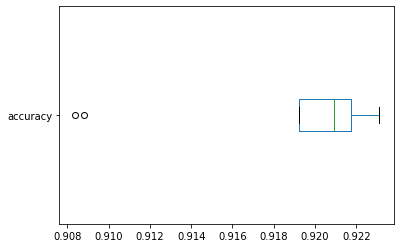

        accuracy
count  10.000000
mean    0.918614
std     0.005418
min     0.908346
25%     0.919239
50%     0.920945
75%     0.921732
max     0.923097


svc
Outliers: 3


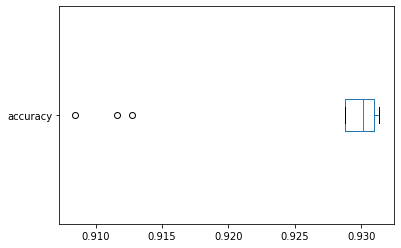

        accuracy
count  20.000000
mean    0.927312
std     0.007159
min     0.908399
25%     0.928819
50%     0.930157
75%     0.930945
max     0.931339


decision_tree
Outliers: 4


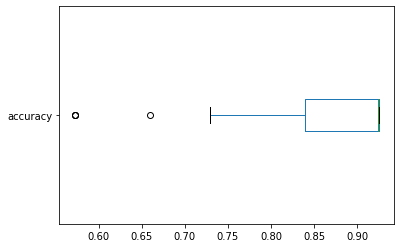

        accuracy
count  30.000000
mean    0.858467
std     0.118771
min     0.572178
25%     0.839790
50%     0.924173
75%     0.924816
max     0.925197


random_forest
Outliers: 3


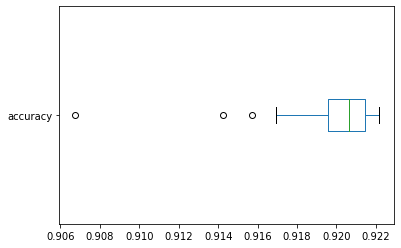

        accuracy
count  30.000000
mean    0.919687
std     0.003116
min     0.906719
25%     0.919580
50%     0.920656
75%     0.921430
max     0.922152


single_mlp
Outliers: 8


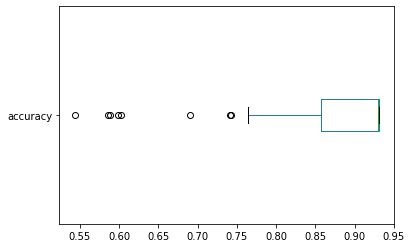

        accuracy
count  50.000000
mean    0.868406
std     0.112055
min     0.543150
25%     0.856785
50%     0.930079
75%     0.930459
max     0.930971


double_mlp
Outliers: 5


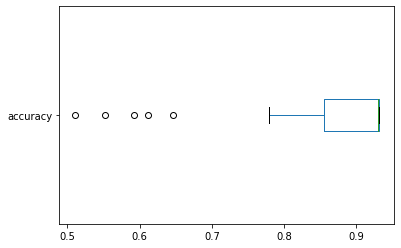

        accuracy
count  50.000000
mean    0.872403
std     0.107352
min     0.509816
25%     0.855892
50%     0.930210
75%     0.930748
max     0.931286


mlp_ensemble
Outliers: 12


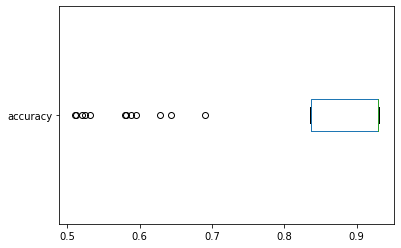

        accuracy
count  50.000000
mean    0.838438
std     0.153459
min     0.509974
25%     0.836365
50%     0.928924
75%     0.929633
max     0.930814




In [ ]:
for study_name in studies:
  print(study_name)
  study = studies[study_name]
  acc_df = evaluate_study(study)
  print(acc_df.describe())
  print('\n')

Model knn
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       158
           1       0.93      0.95      0.94       223

    accuracy                           0.93       381
   macro avg       0.93      0.93      0.93       381
weighted avg       0.93      0.93      0.93       381



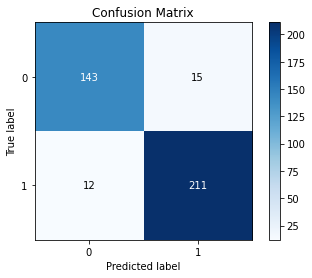

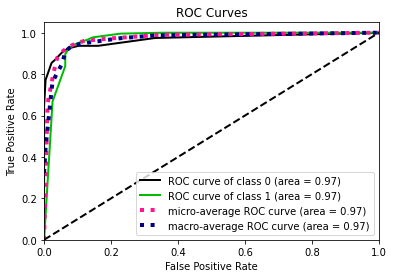

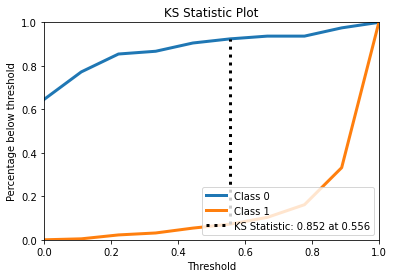

Model svc
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       158
           1       0.94      0.96      0.95       223

    accuracy                           0.94       381
   macro avg       0.94      0.94      0.94       381
weighted avg       0.94      0.94      0.94       381



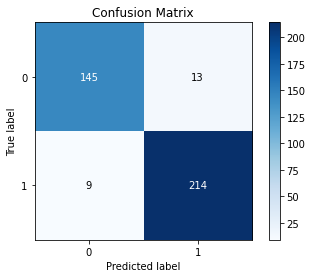

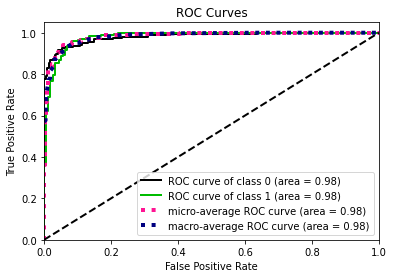

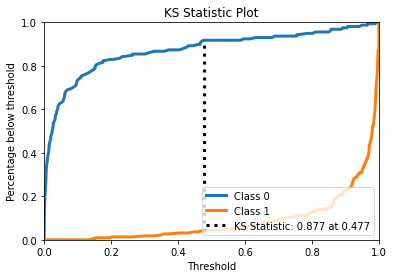

Model decision_tree
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       158
           1       0.94      0.96      0.95       223

    accuracy                           0.94       381
   macro avg       0.94      0.94      0.94       381
weighted avg       0.94      0.94      0.94       381



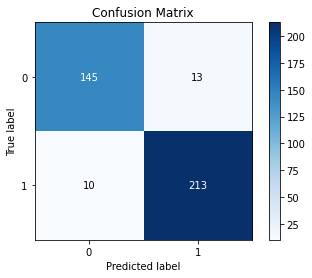

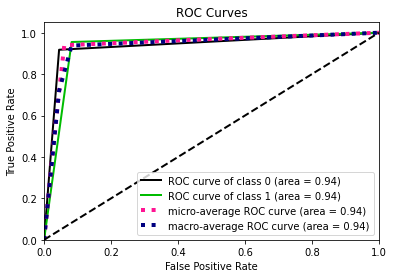

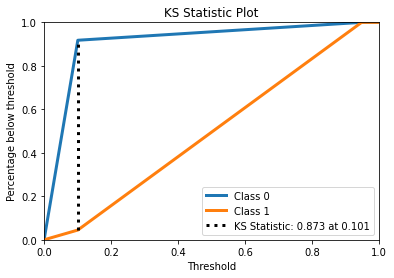

Model random_forest
              precision    recall  f1-score   support

           0       0.95      0.90      0.93       158
           1       0.93      0.97      0.95       223

    accuracy                           0.94       381
   macro avg       0.94      0.93      0.94       381
weighted avg       0.94      0.94      0.94       381



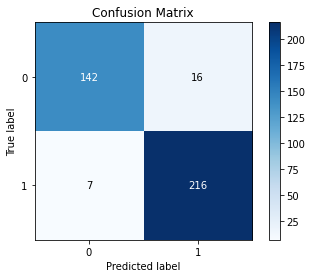

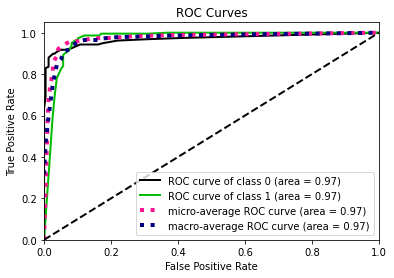

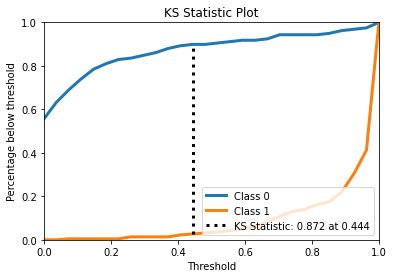

Model single_mlp
              precision    recall  f1-score   support

           0       0.94      0.89      0.92       158
           1       0.93      0.96      0.94       223

    accuracy                           0.93       381
   macro avg       0.93      0.93      0.93       381
weighted avg       0.93      0.93      0.93       381



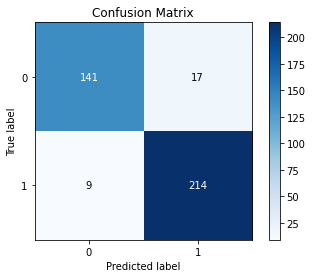

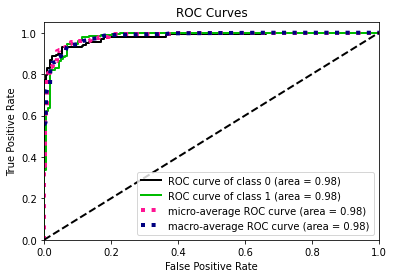

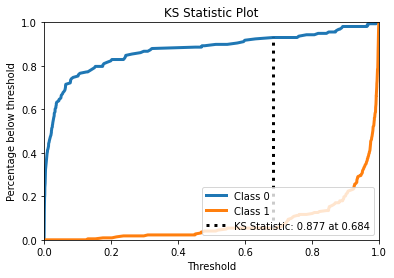

Model double_mlp
              precision    recall  f1-score   support

           0       0.94      0.89      0.92       158
           1       0.93      0.96      0.94       223

    accuracy                           0.93       381
   macro avg       0.93      0.93      0.93       381
weighted avg       0.93      0.93      0.93       381



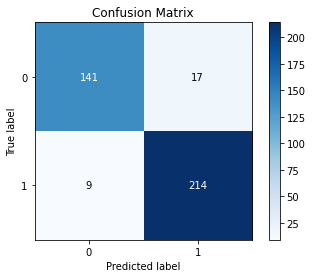

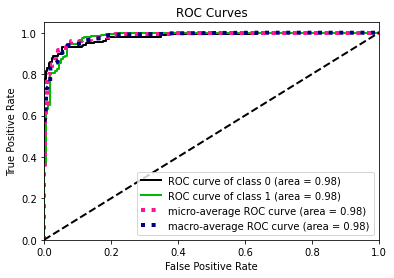

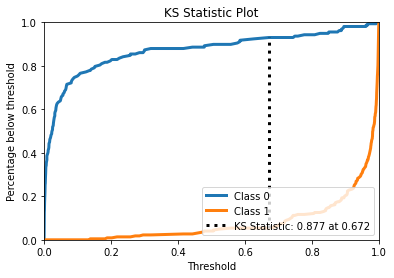

Model mlp_ensemble
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       158
           1       0.93      0.96      0.95       223

    accuracy                           0.94       381
   macro avg       0.94      0.93      0.93       381
weighted avg       0.94      0.94      0.94       381



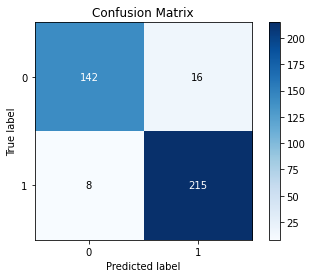

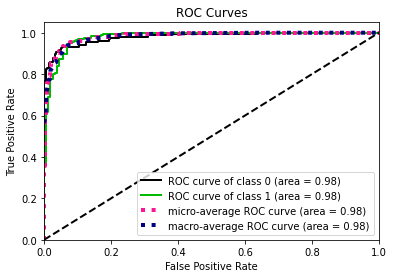

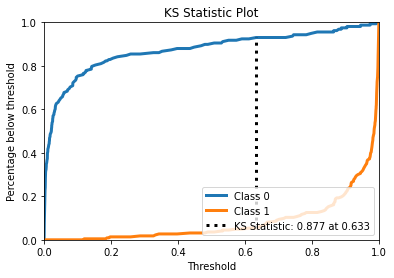

Model hybrid_ensemble
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       158
           1       0.94      0.96      0.95       223

    accuracy                           0.94       381
   macro avg       0.94      0.94      0.94       381
weighted avg       0.94      0.94      0.94       381



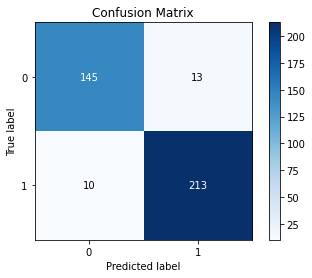

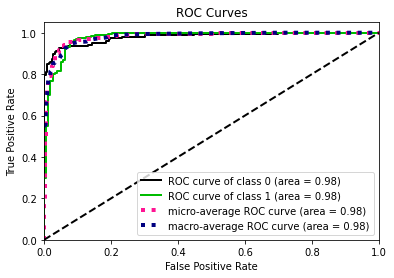

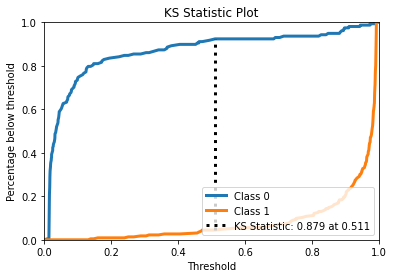


Teste de hipótese: knn vs. svc
t-Statistic: -0.754735
P-value: 0.484418
Mesmo desempenho

Teste de hipótese: knn vs. decision_tree
t-Statistic: -1.358077
P-value: 0.232507
Mesmo desempenho

Teste de hipótese: knn vs. random_forest
t-Statistic: -0.276576
P-value: 0.793174
Mesmo desempenho

Teste de hipótese: knn vs. single_mlp
t-Statistic: 0.971877
P-value: 0.375748
Mesmo desempenho

Teste de hipótese: knn vs. double_mlp
t-Statistic: -1.237829
P-value: 0.270732
Mesmo desempenho

Teste de hipótese: knn vs. mlp_ensemble
t-Statistic: 0.642711
P-value: 0.548720
Mesmo desempenho

Teste de hipótese: knn vs. hybrid_ensemble
t-Statistic: -0.565369
P-value: 0.596248
Mesmo desempenho

Teste de hipótese: svc vs. decision_tree
t-Statistic: -0.699546
P-value: 0.515410
Mesmo desempenho

Teste de hipótese: svc vs. random_forest
t-Statistic: 0.000000
P-value: 1.000000
Mesmo desempenho

Teste de hipótese: svc vs. single_mlp
t-Statistic: 1.496048
P-value: 0.194890
Mesmo desempenho

Teste de hipótese: sv

In [ ]:
evaluate_models(best_models, X, Y)

### Análise: stacking

### Pipeline: Redução de dimensionalidade

In [ ]:
def reduce_model_dimensionality(model_factory, var=0.9):
  '''
  Cria um pipeline que executa a normalização individual de conjuntos de
  treinamento e teste e a redução de dimensionalidade para validação cruzada

  Params:
    - model_factory: callable
      Função que gera o modelo a ser otimizado
  Returns: pipeline com o modelo a ser testado com validação e normalização
  '''
  def make_model_pipeline(trial: FixedTrial):
    steps = []
    steps.append(('scaler', MinMaxScaler()))
    steps.append(('pca', PCA(var, svd_solver='auto')))
    steps.append(('model', model_factory(trial)))
    pipeline = Pipeline(steps=steps)
    return pipeline
  return make_model_pipeline

In [ ]:
best_reduced_models = {}
reduced_studies = {}

for name, factory in zip(models, factories):
  model = make_model(X, Y, reduce_model_dimensionality(factory))
  study = create_study(study_name=name+'_reduced', direction='maximize')
  study.optimize(model, n_trials=TRIAL_NUMBER[name])
  reduced_studies[name] = study
  best_model = recreate_study_best_model(study, name)
  best_reduced_models[name] = best_model

[I 2021-12-20 08:19:39,268] A new study created in memory with name: knn_reduced
[I 2021-12-20 08:19:40,183] Trial 0 finished with value: 0.924514435695538 and parameters: {'n_neighbors': 9, 'weights': 'uniform', 'p': 2}. Best is trial 0 with value: 0.924514435695538.
[I 2021-12-20 08:19:40,692] Trial 1 finished with value: 0.9183727034120736 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'p': 1}. Best is trial 0 with value: 0.924514435695538.
[I 2021-12-20 08:19:41,193] Trial 2 finished with value: 0.9137007874015748 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'p': 1}. Best is trial 0 with value: 0.924514435695538.
[I 2021-12-20 08:19:41,685] Trial 3 finished with value: 0.9183202099737532 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'p': 2}. Best is trial 0 with value: 0.924514435695538.
[I 2021-12-20 08:19:42,197] Trial 4 finished with value: 0.9198425196850394 and parameters: {'n_neighbors': 9, 'weights': 'distance', 'p': 1}. Best is trial 0 wi

In [ ]:
estimators = [(name, best_reduced_models[name]) for name in best_reduced_models]
ensemble = VotingClassifier(estimators, voting='soft')
best_reduced_models['hybrid_ensemble'] = ensemble

knn
Outliers: 0


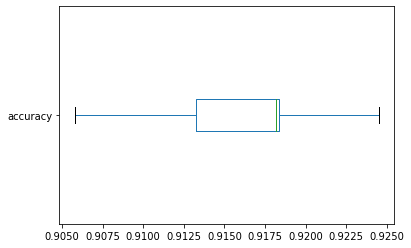

        accuracy
count  10.000000
mean    0.915727
std     0.005781
min     0.905774
25%     0.913268
50%     0.918163
75%     0.918360
max     0.924514


svc
Outliers: 4


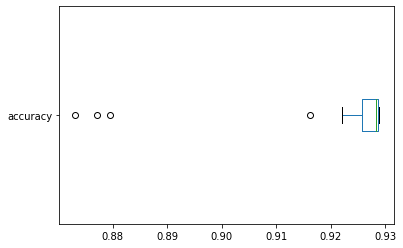

        accuracy
count  20.000000
mean    0.919543
std     0.018790
min     0.873018
25%     0.925669
50%     0.928241
75%     0.928622
max     0.928819


decision_tree
Outliers: 7


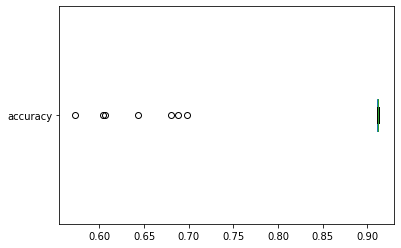

        accuracy
count  30.000000
mean    0.848961
std     0.118464
min     0.572178
25%     0.911142
50%     0.911837
75%     0.912323
max     0.912808


random_forest
Outliers: 4


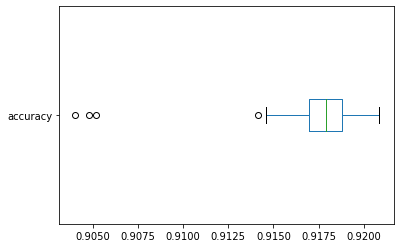

        accuracy
count  30.000000
mean    0.916649
std     0.004307
min     0.903990
25%     0.916955
50%     0.917900
75%     0.918780
max     0.920840


single_mlp
Outliers: 9


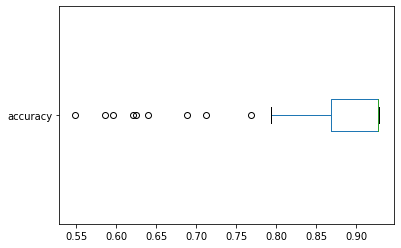

        accuracy
count  50.000000
mean    0.866883
std     0.112991
min     0.547822
25%     0.867874
50%     0.927087
75%     0.927559
max     0.928241


double_mlp
Outliers: 0


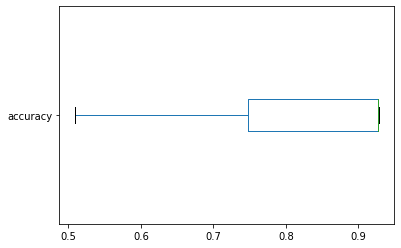

        accuracy
count  50.000000
mean    0.837609
std     0.145377
min     0.508504
25%     0.748150
50%     0.927139
75%     0.927402
max     0.928189


mlp_ensemble
Outliers: 7


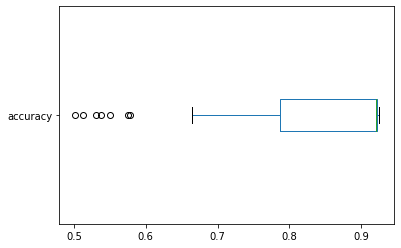

        accuracy
count  50.000000
mean    0.828669
std     0.138780
min     0.500840
25%     0.787467
50%     0.920604
75%     0.922612
max     0.924672




In [ ]:
for study_name in reduced_studies:
  print(study_name)
  study = reduced_studies[study_name]
  acc_df = evaluate_study(study)
  print(acc_df.describe())
  print('\n')

Model knn
              precision    recall  f1-score   support

           0       0.96      0.89      0.93       150
           1       0.93      0.98      0.96       231

    accuracy                           0.94       381
   macro avg       0.95      0.94      0.94       381
weighted avg       0.95      0.94      0.94       381



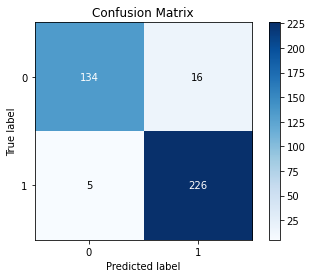

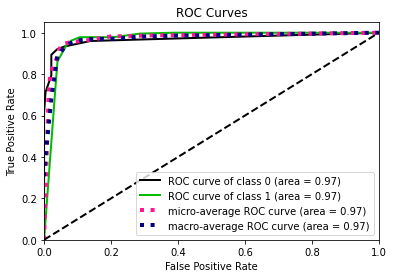

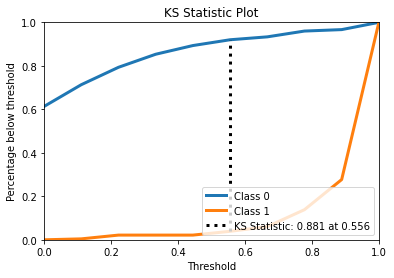

Model svc
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       150
           1       0.93      0.97      0.95       231

    accuracy                           0.94       381
   macro avg       0.94      0.93      0.94       381
weighted avg       0.94      0.94      0.94       381



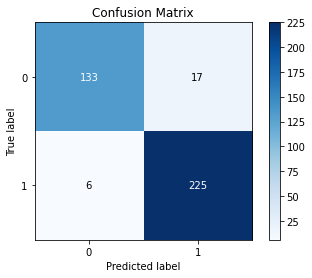

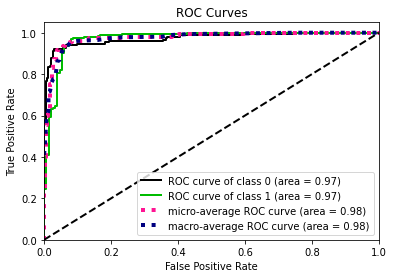

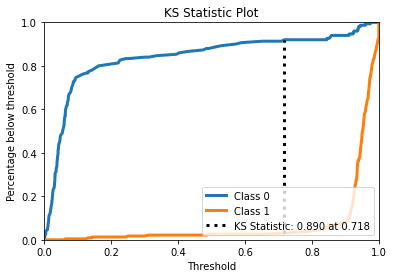

Model decision_tree
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       150
           1       0.93      0.97      0.95       231

    accuracy                           0.94       381
   macro avg       0.94      0.93      0.94       381
weighted avg       0.94      0.94      0.94       381



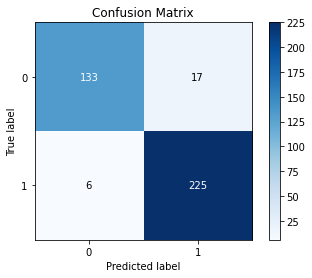

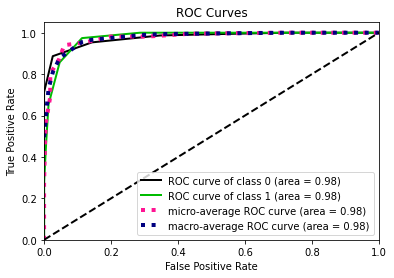

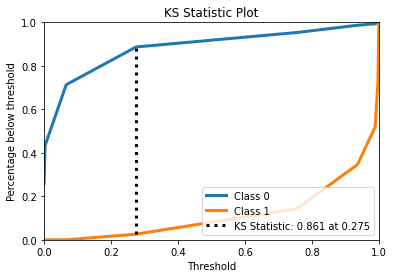

Model random_forest
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       150
           1       0.92      0.97      0.95       231

    accuracy                           0.93       381
   macro avg       0.94      0.92      0.93       381
weighted avg       0.94      0.93      0.93       381



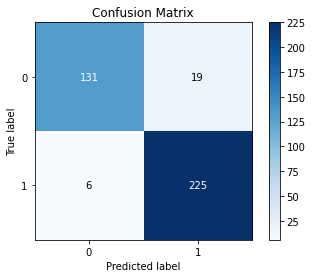

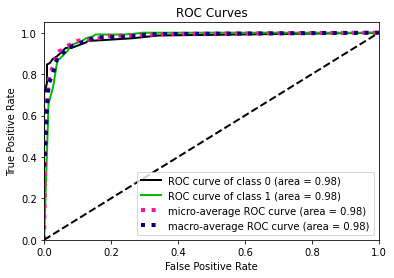

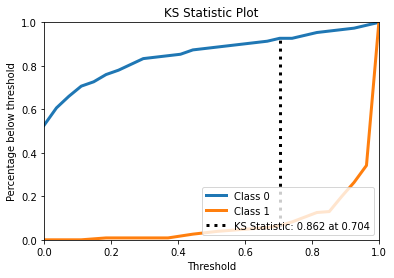

Model single_mlp
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       150
           1       0.93      0.97      0.95       231

    accuracy                           0.94       381
   macro avg       0.94      0.93      0.94       381
weighted avg       0.94      0.94      0.94       381



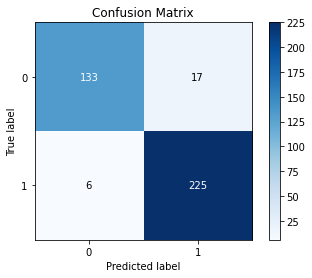

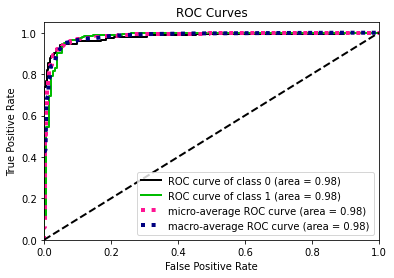

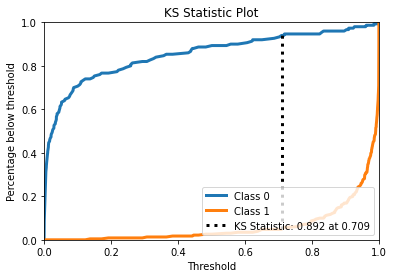

Model double_mlp
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       150
           1       0.93      0.97      0.95       231

    accuracy                           0.94       381
   macro avg       0.95      0.93      0.94       381
weighted avg       0.94      0.94      0.94       381



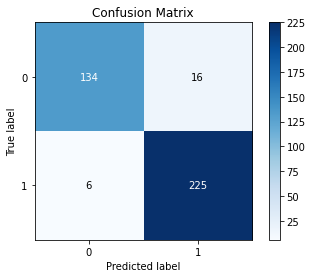

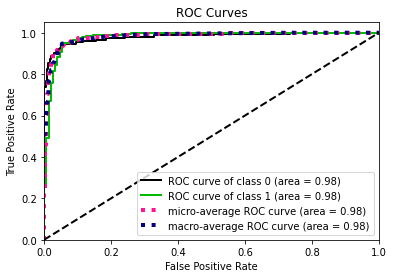

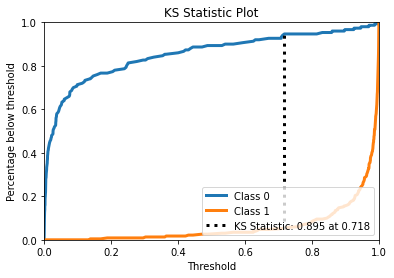

Model mlp_ensemble
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       150
           1       0.93      0.97      0.95       231

    accuracy                           0.94       381
   macro avg       0.95      0.93      0.94       381
weighted avg       0.94      0.94      0.94       381



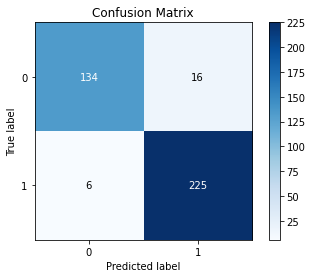

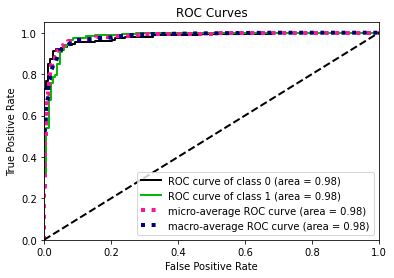

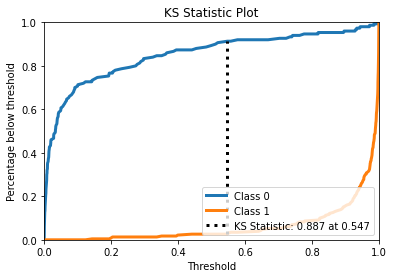

Model hybrid_ensemble
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       150
           1       0.93      0.97      0.95       231

    accuracy                           0.94       381
   macro avg       0.95      0.93      0.94       381
weighted avg       0.94      0.94      0.94       381



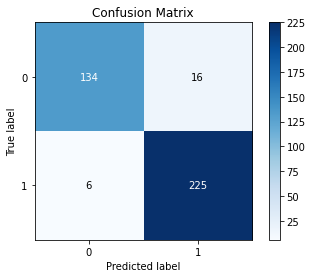

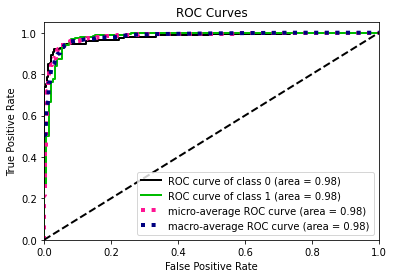

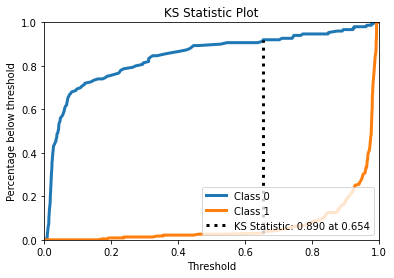


Teste de hipótese: knn vs. svc
t-Statistic: 1.731108
P-value: 0.143986
Mesmo desempenho

Teste de hipótese: knn vs. decision_tree
t-Statistic: -2.858963
P-value: 0.035450
Diferença real

Teste de hipótese: knn vs. random_forest
t-Statistic: -0.997883
P-value: 0.364148
Mesmo desempenho

Teste de hipótese: knn vs. single_mlp
t-Statistic: 1.338789
P-value: 0.238282
Mesmo desempenho

Teste de hipótese: knn vs. double_mlp
t-Statistic: 1.366903
P-value: 0.229908
Mesmo desempenho

Teste de hipótese: knn vs. mlp_ensemble
t-Statistic: -0.812208
P-value: 0.453590
Mesmo desempenho

Teste de hipótese: knn vs. hybrid_ensemble
t-Statistic: -0.576137
P-value: 0.589484
Mesmo desempenho

Teste de hipótese: svc vs. decision_tree
t-Statistic: -1.393732
P-value: 0.222175
Mesmo desempenho

Teste de hipótese: svc vs. random_forest
t-Statistic: -2.076227
P-value: 0.092504
Mesmo desempenho

Teste de hipótese: svc vs. single_mlp
t-Statistic: -0.253208
P-value: 0.810188
Mesmo desempenho

Teste de hipótese: svc

In [ ]:
evaluate_models(best_reduced_models, X, Y)

#### Representação espacial do modelo